# IA048 - Aprendizado de Máquina
## Exercício de Fixação de Conceitos (EFC) 2 - 2s2020

### Parte 1 - Classificação Binária

In [45]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import preprocessing
import numpy as np
import seaborn as sns

In [46]:
data = pd.read_csv("dados_voz_genero.csv")

In [47]:
data.head()

,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1.0
1,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1.0
2,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1.0
3,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1.0
4,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1.0


- We have a dataset with 3168 samples, each sample has 19 features and one label
    - '0' is fem and '1' is masc
- Each feature/attribute was extracted from voice recorded portions considering a range of frequencies from 0 to 280Hz

In [48]:
data.info()
data["label"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sd        3168 non-null   float64
 1   median    3168 non-null   float64
 2   Q25       3168 non-null   float64
 3   Q75       3168 non-null   float64
 4   IQR       3168 non-null   float64
 5   skew      3168 non-null   float64
 6   kurt      3168 non-null   float64
 7   sp.ent    3168 non-null   float64
 8   sfm       3168 non-null   float64
 9   mode      3168 non-null   float64
 10  centroid  3168 non-null   float64
 11  meanfun   3168 non-null   float64
 12  minfun    3168 non-null   float64
 13  maxfun    3168 non-null   float64
 14  meandom   3168 non-null   float64
 15  mindom    3168 non-null   float64
 16  maxdom    3168 non-null   float64
 17  dfrange   3168 non-null   float64
 18  modindx   3168 non-null   float64
 19  label     3168 non-null   float64
dtypes: float64(20)
memory usage: 4

0.0    1584
1.0    1584
Name: label, dtype: int64

- All cells are fully filled with the data, so we won't have to deal with this problem
- The dataset is balanced

In [49]:
# Separating male from female to plot the histograms
male = data.loc[data["label"] == 1]
female = data.loc[data["label"] == 0]

In [50]:
male.head()

,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1.0
1,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1.0
2,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1.0
3,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1.0
4,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1.0


In [51]:
female.head()

,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
1584,0.082782,0.191191,0.062350,0.224552,0.162202,2.801344,19.929617,0.952161,0.679223,0.049926,0.158108,0.185042,0.023022,0.275862,0.272964,0.046875,0.742188,0.695312,0.339888,0.0
1585,0.067789,0.200639,0.175489,0.226068,0.050579,3.001890,19.865482,0.910458,0.506099,0.050020,0.182855,0.159590,0.018713,0.266667,0.258970,0.054688,0.804688,0.750000,0.269231,0.0
1586,0.061974,0.211358,0.184422,0.235687,0.051265,2.543841,14.921964,0.904432,0.425289,0.049961,0.199807,0.156465,0.016194,0.266667,0.250446,0.054688,0.898438,0.843750,0.329521,0.0
1587,0.072087,0.204656,0.180611,0.255954,0.075344,2.392326,10.061489,0.907115,0.524209,0.193435,0.195280,0.182629,0.024922,0.275862,0.269531,0.054688,0.703125,0.648438,0.294717,0.0
1588,0.057550,0.220229,0.190343,0.249759,0.059416,1.707786,5.670912,0.879674,0.343548,0.050165,0.208504,0.162043,0.016807,0.262295,0.260789,0.054688,0.812500,0.757812,0.251546,0.0


In [52]:
features = male.columns.tolist()
print(features)

['sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label']


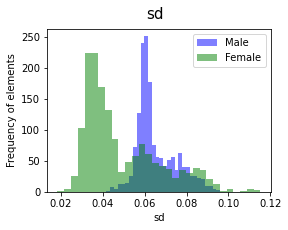

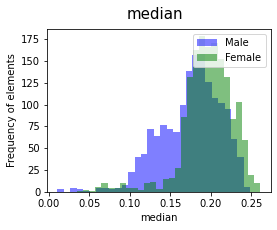

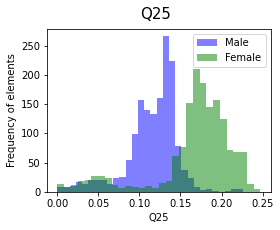

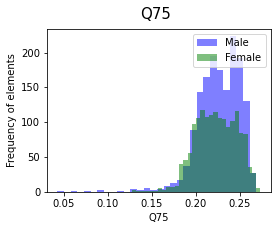

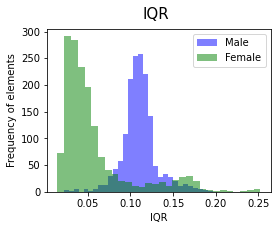

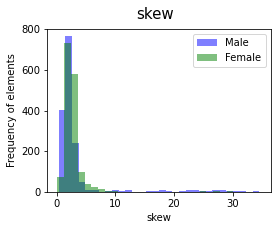

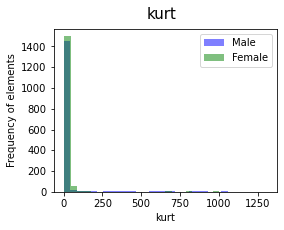

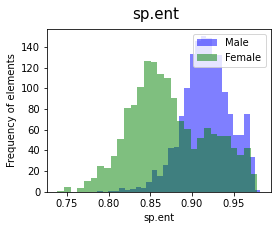

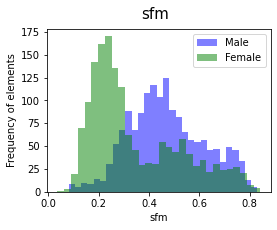

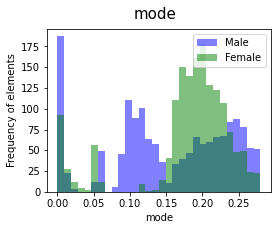

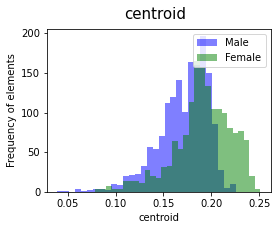

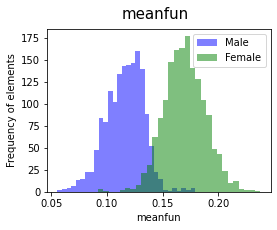

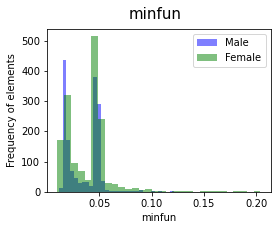

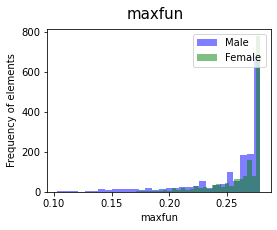

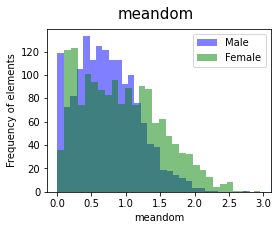

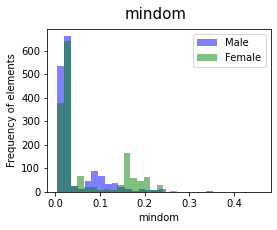

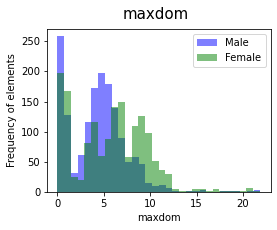

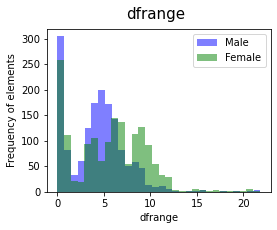

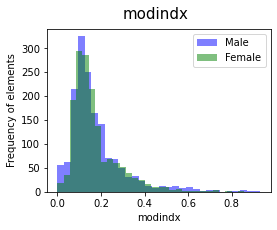

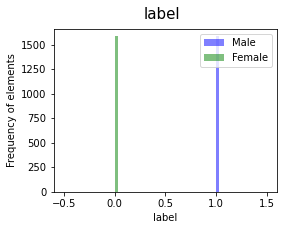

In [53]:
# Getting the histograms
for k in features:
    plt.figure(figsize=(4,3),facecolor='white',edgecolor='black')
    plt.hist(male[k], bins = 30, alpha = 0.5, label = 'Male', color = 'Blue')
    plt.hist(female[k], bins = 30, alpha = 0.5, label = 'Female', color = 'Green')
    plt.legend(loc='upper right')
    plt.suptitle(k, fontsize=15)
    plt.xlabel(k)
    plt.ylabel("Frequency of elements")
    plt.show()

Looking at the histograms we are able to analyse some characteristics of the features:
- The standard deviation of the voice frequencies for men is bigger than for woman in general
- The median of the voice frequencies is concentrated around the same value (200Hz). However, for men we have also have some lower medians around 150Hz.
- For the first quantile (Q25 in kHz), we are in fact looking at 25% of the lowest voice frequency data from each dataset (male/female). We can clearly distinguish men commonly with a lower frequency voice than women.
- For the third quantile (Q75 in kHz),  we are in fact looking at 25% of the highest voice frequency data from each dataset (male/female). It is more difficult to distinguish both classes, so maybe, if we were up to choose the features to input in our ML model, we could let this one out. However, we can also see that the quantity of higher frequencies for men in this quantile way bigger than for women.
- For the Interquantile (50% of the data around the median value, IQR given in kHz), we can see that essentially, we have two well separated peaks of voice frequencies, one around 30/40Hz for women and other around 110/120Hz for men.
- The centroid indicates where the center of mass of the spectrum is located in kHz. Mostly of centroids are around 180Hz of frequency.
- The skewness, a measure of the asymmetry of the probability distribution, is essentially very mixed between men and women, so maybe, if we were up to choose the features to input in our ML model, we could let this one out.
- The kurtosis, number that is related to the tails of the distribution, is also very close and close to zero, so maybe, if we were up to choose the features to input in our ML model, we could let this one out.
- keep commenting for the others

We can also do some considerations on the $\textbf{correlation}$ between these different features. A correlation is considered as relation between two random variables. In fact, it refers to how close two variables are to having a linear relationship with each other. It means that, if two features have a high correlation, in theory, we could drop one them and work only with the other, since the addition of the second one would not insert further information than we already had only with the first one.

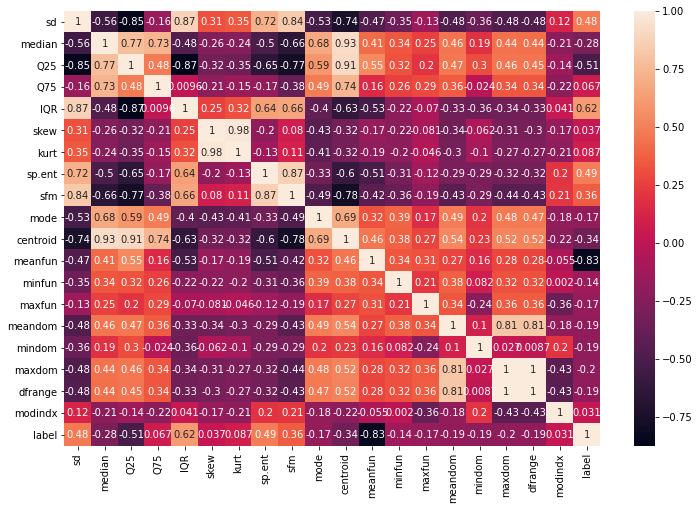

In [54]:
data_correlation = data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(data_correlation, annot = True)
plt.show()

According to the Pearson correlation:
- A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
- A value closer to 1 implies stronger positive correlation
- A value closer to -1 implies stronger negative correlation

What we could do to chose our features would be: 
- Look at the correlation of the features with our label. For example, take a look at meanfun and compare with the histograms. meanfun is highly correlated with the label, and it is also possible to see in the histogram, since the two classes are very separated, so it would be a VERY GOOD feature to feed our model with.
- We could choose a threshold (for example, $|corr| > 0.3$) and only use the features that have a higher correlation (with the label) than this threshold.

In [55]:
label_correlation = abs(data_correlation["label"])
good_features = label_correlation[label_correlation > 0.3]
display(good_features)

sd          0.479539
Q25         0.511455
IQR         0.618916
sp.ent      0.490552
sfm         0.357499
centroid    0.337415
meanfun     0.833921
label       1.000000
Name: label, dtype: float64

However, let's use ALL THE FEATURES to train a model, but before, it may be a good option:
- Normalize/Standardize our data because some of it has varying scales
- Randomize our data
- Separate the training/testing set
- Separate the labels since they are what we are willing to predict

In [56]:
# Normalizing our data with the MinMax Scaler
data_np = data.values
min_max_scaler = preprocessing.MinMaxScaler()
data_np_normalized = min_max_scaler.fit_transform(data_np)
data_normalized = pd.DataFrame(data_np_normalized, columns = data.columns)

We chose to normalize our data with MinMaxScaler. However, we could standardise our data using the mean and the standard devation instead. The type of scaler that we use could be considered as an hyperparameter to be chosen. In our case, we chose to normalize because our initial data had some features with very different scaling and it can affect the model performance when training it.

In [57]:
data_normalized.head()

,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.473409,0.084125,0.060063,0.204956,0.254828,0.367853,0.208279,0.635798,0.564526,0.000000,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000,1.0
1,0.505075,0.116900,0.077635,0.215683,0.246961,0.644279,0.483766,0.630964,0.591578,0.000000,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,0.056449,1.0
2,0.675536,0.102873,0.034284,0.385912,0.457148,0.885255,0.782275,0.442738,0.548382,0.000000,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,0.049885,1.0
3,0.554611,0.587559,0.389906,0.715802,0.407358,0.031549,0.001613,0.923261,0.856457,0.299565,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043,1.0
4,0.627209,0.454272,0.317627,0.707515,0.474474,0.027742,0.001732,0.958736,0.926348,0.372362,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380,1.0


In [58]:
# Separating into train and test in a randomized way
msk = np.random.randn(len(data_normalized)) < 0.8
train = data_normalized[msk]
validation = data_normalized[~msk]


In [59]:
# Randomizing again
train = train.sample(frac = 1)
validation = validation.sample(frac = 1)

In [60]:
train.head()

,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
280,0.584191,0.717701,0.427858,0.795958,0.445643,0.346903,0.249420,0.853335,0.723735,0.000000,0.595032,0.343512,0.110520,0.904450,0.174656,0.006452,0.160472,0.160587,0.200054,1.0
1875,0.324011,0.724999,0.626108,0.783962,0.227875,0.030277,0.001410,0.773098,0.449736,0.712513,0.707359,0.460064,0.118430,0.791561,0.183271,0.350538,0.118656,0.111588,0.180373,0.0
1059,0.380613,0.797147,0.537651,0.838544,0.372790,0.035720,0.001856,0.700161,0.386300,0.824013,0.722723,0.375789,0.191881,0.981526,0.474068,0.040860,0.359900,0.359442,0.119786,1.0
1243,0.416731,0.748921,0.494433,0.846440,0.425387,0.072367,0.007092,0.680018,0.433657,0.434171,0.682541,0.396796,0.195251,0.999749,0.432456,0.040860,0.330951,0.330472,0.132124,1.0
2590,0.123976,0.876577,0.862268,0.890863,0.086012,0.048401,0.002457,0.374609,0.143311,0.834459,0.890598,0.650926,0.192834,0.999749,0.526980,0.040860,0.460686,0.460300,0.104559,0.0


In [61]:
validation.head()

,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
70,0.418121,0.595243,0.507363,0.685108,0.255459,0.069101,0.007220,0.760191,0.556090,0.452996,0.606337,0.420296,0.045108,0.857144,0.352798,0.006452,0.312723,0.312947,0.062608,1.0
537,0.788355,0.589113,0.216334,0.744531,0.615697,0.902544,0.798030,0.391615,0.568169,0.000000,0.463018,0.101364,0.030899,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000,1.0
2402,0.195026,0.830048,0.815865,0.894580,0.137866,0.055284,0.004144,0.471415,0.223364,0.718310,0.858394,0.677766,0.276887,0.990585,0.361153,0.040860,0.263402,0.262876,0.121682,0.0
1879,0.259914,0.771747,0.699502,0.787140,0.154645,0.058986,0.005663,0.695693,0.319934,0.791220,0.750093,0.562841,0.044559,0.929285,0.184123,0.298925,0.253395,0.247496,0.078012,0.0
24,0.601089,0.534862,0.488411,0.842854,0.428169,0.176715,0.063802,0.798776,0.658199,0.214565,0.571680,0.238252,0.032533,0.981526,0.067442,0.006452,0.180486,0.180615,0.079249,1.0


In [62]:
train_x = train.drop(columns = ['label'])
train_y = train['label']
validation_x = validation.drop(columns = ['label'])
validation_y = validation['label']

In [63]:
train_x = train_x.to_numpy()
train_y = train_y.to_numpy()
validation_x = validation_x.to_numpy()
validation_y = validation_y.to_numpy()
print(train_x.shape)
print(train_y.shape)
print(validation_x.shape)
print(validation_y.shape)

(2481, 19)
(2481,)
(687, 19)
(687,)


Now our data is essentially ready to feed our model, we can work on the regression model itself

In [87]:
from sklearn.linear_model import LogisticRegression
# Trying LR with the sag solver
LR_sag = LogisticRegression(random_state=0,solver='sag').fit(train_x,train_y)

In [122]:
# Predicting the final probabilities using the sag optimizer
y_proba_pred = LR_sag.predict_proba(validation_x)
display(y_proba_pred)
display(y_proba_pred.shape)

array([[0.4386619 , 0.5613381 ],
       [0.01363412, 0.98636588],
       [0.97605858, 0.02394142],
       ...,
       [0.04387602, 0.95612398],
       [0.98985325, 0.01014675],
       [0.99429115, 0.00570885]])

(687, 2)

In [123]:
# Creating a threshold to plot the ROC matrix afterwards
threshold_values = np.arange(0,1.05,0.05)
y_pred = np.zeros(shape=(len(y_proba_pred),len(threshold_values)))
acc = 0

for threshold in threshold_values:
    for j in range(len(y_proba_pred)):
        if (y_proba_pred[j,1] > threshold):
            y_pred[j,acc] = 1
        else:
            y_pred[j,acc] = 0
    acc = acc + 1
      

In [79]:
from sklearn import metrics
confusion_matrix_sag = metrics.confusion_matrix(validation_y,y_pred)
display(confusion_matrix_sag)

array([[322,  15],
       [  4, 346]], dtype=int64)

array([[322,  15],
       [  4, 346]], dtype=int64)

Text(0.5, 15.0, 'Predicted label')

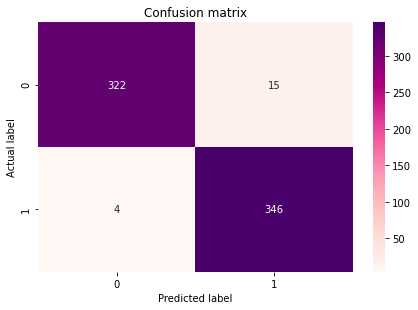

In [86]:
class_names = ["Female","Male"]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Creating a visual confusion matrix in a heatmap form
sns.heatmap(pd.DataFrame(confusion_matrix_sag), cmap="RdPu", annot=True,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')